<a href="https://colab.research.google.com/github/JeanAlmeida1/Heart-Disease-Prediction/blob/main/Classificacao_heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Criando um modelo de classificação para prever doenças do coração em pacientes.** 

Dataset: https://www.kaggle.com/datasets/priyanka841/heart-disease-prediction-uci?select=heart.csv

**INFORMAÇÕES DO DATASET:**
- age: Idade (Anos)
- sex: Sexo (1 = Masc e 0 = Fem)
- cp: Nível de dor ( 1 a 4 )
- trestbps: Pressão sanguínea em Repouso
- chol: colesterol em mg/dl:
- fbs: Fasting Blood Sugar (Teste diabético) > 120 mg/dl
- restecg: Eletrocardiogramas em repouso (0,1 ou 2)
- thalach: Ritmo cardíaco
- exang: Exercício físico que gerou Angina
- oldpeak: Depressão de ST induzida por exercício em relação ao
repouso
- slope: Tipo de inclinação do segmento ST de pico do exercício
- ca: número de vasos sanguínios ressaltados (coloridos por
fluoroscopia)
- thal: Talassemia -> 3 = normal; 6 = fixed defect; 7 = reversable
defect


## Inspeção inicial 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe(percentiles=[0.01, 0.05, 0.25, 0.75, 0.9, 0.99])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,35.000000,0.000000,0.000000,100.000000,149.000000,0.000000,0.000000,95.020000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
5%,39.100000,0.000000,0.000000,108.000000,175.000000,0.000000,0.000000,108.100000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
90%,66.000000,1.000000,2.000000,152.000000,308.800000,1.000000,1.000000,176.600000,1.000000,2.800000,2.000000,2.000000,3.000000,1.000000


Não temos valores nulos, e o dataset não parece ter problemas de outliers.

## Análise gráfica

<Figure size 432x288 with 0 Axes>

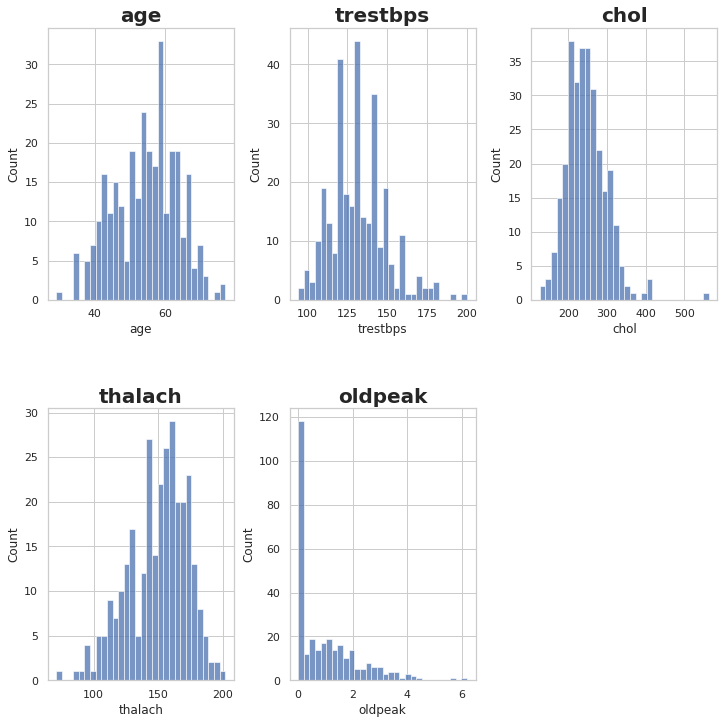

In [7]:
# Plotando o histograma das variáveis 

sns.set_theme(style='whitegrid')
#1 - definindo o número de linhas e colunas do plot (selecionando apenas algumas variáveis) 
colnames_number = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].columns
ncols = 3
nrows = int(np.ceil(len(colnames_number)/ncols*1.0))

#2 - Fazendo um for para percorrer todos os axis e plotar as figuras

fig = plt.figure()
fig, axes = plt.subplots(nrows = nrows, ncols=ncols, figsize=(12,12))   


counter = 0
for i in range(nrows):
  for j in range(ncols):
    ax = axes[i][j]
    
    if counter < len(colnames_number):
      sns.histplot(x = df.select_dtypes(include='number')[colnames_number[counter]], palette='hls', bins=30, ax=ax)
      ax.set_title(colnames_number[counter], fontsize=20, fontweight='bold')
    else:
      ax.set_axis_off()
    counter += 1 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)

fig.show()


<Figure size 432x288 with 0 Axes>

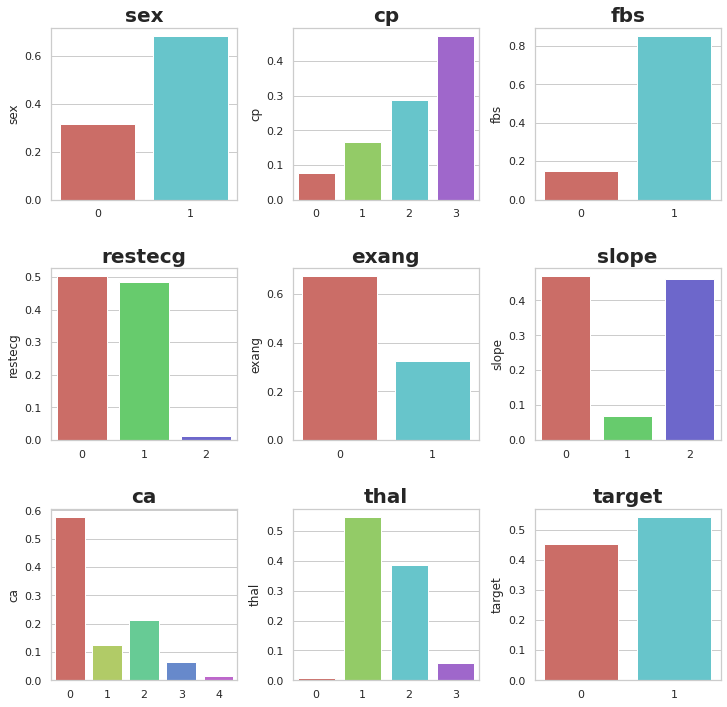

In [8]:
# Plotando barplot das variáveis

# Selecionando todas as variáveis, menos as numéricas não-categóricas
colnames_cat = df[df.columns[~df.columns.isin(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])]].columns
ncols = 3
nrows = int(np.ceil(len(colnames_cat)/ncols*1.0))

#2 - Fazendo um for para percorrer todos os axis e plotar as figuras

fig = plt.figure()
fig, axes = plt.subplots(nrows = nrows, ncols=ncols, figsize=(12,12))   


counter = 0
for i in range(nrows):
  for j in range(ncols):
    ax = axes[i][j]
    
    if counter < len(colnames_cat):
      sns.barplot(x = df[colnames_cat[counter]].unique(), y = df[colnames_cat[counter]].value_counts(normalize=True) , palette='hls',  ax=ax)
      ax.set_title(colnames_cat[counter], fontsize=20, fontweight='bold')
    else:
      ax.set_axis_off()
    counter += 1 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)

fig.show()

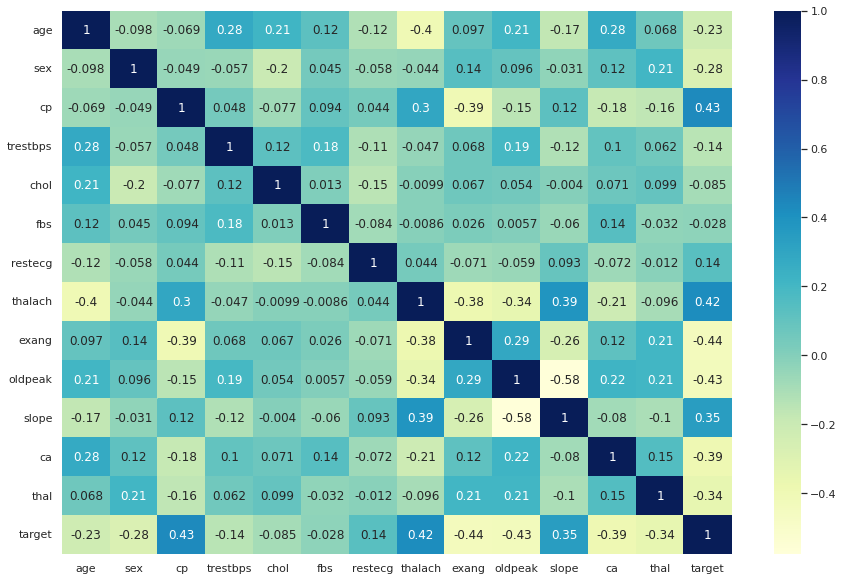

In [9]:
# Correlação entre as variáveis 

p = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(p, annot=True, cmap='YlGnBu')

## Transformação de variáveis

In [10]:
# Normalizando as variáveis 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'

from sklearn.preprocessing import StandardScaler

In [11]:
Scaler = StandardScaler()

age_norm = Scaler.fit_transform(df['age'].values.reshape(-1,1))
trestbps_norm = Scaler.fit_transform(df['trestbps'].values.reshape(-1,1))
chol_norm = Scaler.fit_transform(df['chol'].values.reshape(-1,1))
thalach_norm = Scaler.fit_transform(df['thalach'].values.reshape(-1,1))
oldpeak_norm = Scaler.fit_transform(df['oldpeak'].values.reshape(-1,1))

In [12]:
df_norm = df.copy()

In [13]:
df_norm['age_norm'] = age_norm
df_norm['trestbps_norm'] = trestbps_norm
df_norm['chol_norm'] = chol_norm
df_norm['thalach_norm'] = thalach_norm 
df_norm['oldpeak_norm'] = oldpeak_norm 

In [14]:
df_norm = df_norm.drop(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], axis=1)

In [15]:
df_norm.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target,age_norm,trestbps_norm,chol_norm,thalach_norm,oldpeak_norm
0,1,3,1,0,0,0,0,1,1,0.952197,0.763956,-0.256334,0.015443,1.087338
1,1,2,0,1,0,0,0,2,1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,0,1,0,0,0,2,0,2,1,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,1,1,0,1,0,2,0,2,1,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0,0,0,1,1,2,0,2,1,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [16]:
for col in df[df.columns[~df.columns.isin(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])]].columns:
  print('Variável: ', col)
  print('Quantidade de valores únicos: ', df[col].nunique())
  print()

Variável:  sex
Quantidade de valores únicos:  2

Variável:  cp
Quantidade de valores únicos:  4

Variável:  fbs
Quantidade de valores únicos:  2

Variável:  restecg
Quantidade de valores únicos:  3

Variável:  exang
Quantidade de valores únicos:  2

Variável:  slope
Quantidade de valores únicos:  3

Variável:  ca
Quantidade de valores únicos:  5

Variável:  thal
Quantidade de valores únicos:  4

Variável:  target
Quantidade de valores únicos:  2



Variáveis que necessitam de one hot encoding: 'cp', 'restecg', 'slope', 'ca', 'thal'

In [19]:
# Função para realizar one-hot encoding em variáveis

col_dummies = [ 'cp', 'restecg', 'slope', 'ca', 'thal']

def dummy_df(dataframe, col_dummies):
    for col in col_dummies:
        dummies = pd.get_dummies(dataframe[col], prefix=col, dummy_na=False)
        dataframe = dataframe.drop(col, 1)
        dataframe = pd.concat([dataframe, dummies], axis=1)
    return dataframe

In [21]:
df_dummies = dummy_df(df_norm, col_dummies)
df_dummies.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,sex,fbs,exang,target,age_norm,trestbps_norm,chol_norm,thalach_norm,oldpeak_norm,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1,1,0,1,0.952197,0.763956,-0.256334,0.015443,1.087338,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,...,1,1,0,0,0,0,0,0,1,0
3,1,0,0,1,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,...,1,1,0,0,0,0,0,0,1,0
4,0,0,1,1,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,...,1,1,0,0,0,0,0,0,1,0


In [22]:
# Verificando se agora temos apenas binárias 

for col in df_dummies[df_dummies.columns[~df_dummies.columns.isin(['age_norm', 'trestbps_norm', 'chol_norm', 'thalach_norm', 'oldpeak_norm'])]].columns:
  print('Variável: ', col)
  print('Quantidade de valores únicos: ', df_dummies[col].nunique())
  print()

Variável:  sex
Quantidade de valores únicos:  2

Variável:  fbs
Quantidade de valores únicos:  2

Variável:  exang
Quantidade de valores únicos:  2

Variável:  target
Quantidade de valores únicos:  2

Variável:  cp_0
Quantidade de valores únicos:  2

Variável:  cp_1
Quantidade de valores únicos:  2

Variável:  cp_2
Quantidade de valores únicos:  2

Variável:  cp_3
Quantidade de valores únicos:  2

Variável:  restecg_0
Quantidade de valores únicos:  2

Variável:  restecg_1
Quantidade de valores únicos:  2

Variável:  restecg_2
Quantidade de valores únicos:  2

Variável:  slope_0
Quantidade de valores únicos:  2

Variável:  slope_1
Quantidade de valores únicos:  2

Variável:  slope_2
Quantidade de valores únicos:  2

Variável:  ca_0
Quantidade de valores únicos:  2

Variável:  ca_1
Quantidade de valores únicos:  2

Variável:  ca_2
Quantidade de valores únicos:  2

Variável:  ca_3
Quantidade de valores únicos:  2

Variável:  ca_4
Quantidade de valores únicos:  2

Variável:  thal_0
Quantid

In [23]:
df_final = df_dummies.copy()

## Modelagem

In [24]:
df_final.head()

,sex,fbs,exang,target,age_norm,trestbps_norm,chol_norm,thalach_norm,oldpeak_norm,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1,1,0,1,0.952197,0.763956,-0.256334,0.015443,1.087338,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,...,1,1,0,0,0,0,0,0,1,0
3,1,0,0,1,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,...,1,1,0,0,0,0,0,0,1,0
4,0,0,1,1,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,...,1,1,0,0,0,0,0,0,1,0


In [26]:
# Importando modelos 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Importando ferramentas para dividir os dados

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Importando métricas

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Importando outros pacotes

import time

In [27]:
# Definindo variáveis

X = df_final[df_final.columns[df_final.columns!='target']].values 
y = df_final['target'].values

In [28]:
# Dividindo dataset entre treino e teste

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((242, 27), (61, 27), (242,), (61,))

In [30]:
# Definindo modelos a serem testados

classification_models = {"LogisticRegression": LogisticRegression(random_state=42),
                         "DecisionTree":DecisionTreeClassifier(random_state=42),
                         "RandomForest": RandomForestClassifier(random_state=42),
                         "XGBoost": XGBClassifier(random_state=42),
                         "MLPClassifier": MLPClassifier(max_iter = 2000, random_state=42), # max_iter defaut = 200                     
}

In [44]:
# Criando um looping para testar todos os modelos 

df_results = pd.DataFrame(columns=['model', 'run_time', 'recall', 'f1_score','accuracy'])

for key in classification_models:

    print('*',key)

    start_time = time.time()

    clas = classification_models[key]
    model = clas.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)

    scores = cross_val_score(model, 
                             Xtrain, 
                             ytrain,
                             scoring='f1', 
                             cv=5)
    
    print('scores: ', scores)
    print('média scores: ', np.mean(scores))
    print()

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'recall': recall_score(ytest, y_pred),
           'f1_score': f1_score(ytest, y_pred),
           'accuracy': accuracy_score(ytest, y_pred)
    }

    df_results = df_results.append(row, ignore_index=True)

* LogisticRegression
scores:  [0.86206897 0.88888889 0.78571429 0.92592593 0.7755102 ]
média scores:  0.847621654025595

* DecisionTree
scores:  [0.75       0.7037037  0.78571429 0.76923077 0.66666667]
média scores:  0.735063085063085

* RandomForest
scores:  [0.81481481 0.86792453 0.77966102 0.83636364 0.79166667]
média scores:  0.8180861326192315

* XGBoost
scores:  [0.81481481 0.85714286 0.8        0.80769231 0.78431373]
média scores:  0.8127927410280351

* MLPClassifier
scores:  [0.81481481 0.79245283 0.79245283 0.83018868 0.82352941]
média scores:  0.8106877132404323



In [32]:
df_results

,model,run_time,recall,f1_score,accuracy
0,LogisticRegression,0.0,0.87500,0.888889,0.885246
1,DecisionTree,0.0,0.78125,0.819672,0.819672
2,RandomForest,0.02,0.87500,0.875000,0.868852
3,XGBoost,0.01,0.78125,0.819672,0.819672
4,MLPClassifier,0.12,0.87500,0.861538,0.852459


A regressão logística obteve o melhor f1_score, além do melhor recall e accuracy. Portanto, otimizaremos seus hiperparâmetros via GridSearchCV de forma a tentarmos obter um resultado melhor ainda.   

## Otimização de hiperparâmetros

In [33]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

In [34]:
# Definindo hiperparâmetros a serem testados 

parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'dual' : ['Bool', False],
              'fit_intercept' : [True, False],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'random_state' : [42], 
              'n_jobs' : [-1],
              }



In [35]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
search = GridSearchCV(LogisticRegression(), param_grid= parameters, n_jobs=-1, cv=cv, scoring="f1")

In [38]:
result = search.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1740 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [37]:
# Resultados 

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8728611351808695
Best Hyperparameters: {'dual': False, 'fit_intercept': True, 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'}


In [40]:
# Rodando a regressão logística novamente, mas com os hiperparâmetros otimizados 


start_time = time.time()

model_otimized = LogisticRegression(dual=False, fit_intercept=True, n_jobs=-1, penalty='l2', random_state=42, solver='newton-cg')
model_otim = model_otimized.fit(Xtrain, ytrain)
y_pred_otim = model_otim.predict(Xtest)

score = cross_val_score(model_otim, 
                          Xtrain, 
                          ytrain,
                          scoring='f1', 
                          cv=5)

row = {'model': 'LogisticRegression_GridSearch',
        'run_time': format(round((time.time() - start_time)/60,2)),
        'recall': recall_score(ytest, y_pred_otim),
        'f1_score': f1_score(ytest, y_pred_otim),
        'accuracy': accuracy_score(ytest, y_pred_otim)
}

df_results2 = df_results.append(row, ignore_index=True)

In [46]:
print('scores: ', score)
print('média dos scores: ', np.mean(score))

scores:  [0.86206897 0.88888889 0.78571429 0.92592593 0.7755102 ]
média dos scores:  0.847621654025595


In [42]:
df_results2

,model,run_time,recall,f1_score,accuracy
0,LogisticRegression,0.0,0.87500,0.888889,0.885246
1,DecisionTree,0.0,0.78125,0.819672,0.819672
2,RandomForest,0.02,0.87500,0.875000,0.868852
3,XGBoost,0.01,0.78125,0.819672,0.819672
4,MLPClassifier,0.12,0.87500,0.861538,0.852459
5,LogisticRegression_GridSearch,0.0,0.87500,0.888889,0.885246


Com o GridSearch, obtivemos as mesmas métricas do modelo anterior, só que o usamos com o dataset completo. Dessa forma, o modelo está pronto para ser treinado novamente e fazer previsões com dados novos.   